In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import math
import pandasql as ps
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('TITANIC.csv')
ps.sqldf("""SELECT 
    *
    FROM data
""")

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2.0,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3.0,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,4.0,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,5.0,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1306.0,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,1307.0,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,1308.0,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None
1308,1309.0,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,None,S,None,NaN,None


In [3]:
print(data["embarked"].drop_duplicates())
print(data["cabin"].drop_duplicates())

0        S
9        C
168    NaN
206      Q
Name: embarked, dtype: object
0            B5
1       C22 C26
5           E12
6            D7
7           A36
         ...   
1025       E121
1122      F E69
1131        E10
1187         G6
1249        F38
Name: cabin, Length: 187, dtype: object


In [4]:
df = data.copy()
df["sex"] =  df["sex"].apply(lambda x : 1 if x == "male" else 0)
df["sex"]

0       0
1       1
2       0
3       1
4       0
       ..
1305    0
1306    1
1307    1
1308    1
1309    0
Name: sex, Length: 1310, dtype: int64

In [5]:
df.isnull().sum()

PassengerId       1
pclass            1
survived          1
name              1
sex               0
age             264
sibsp             1
parch             1
ticket            1
fare              2
cabin          1015
embarked          3
boat            824
body           1189
home.dest       565
dtype: int64

In [6]:
df["age"] = df["age"].fillna(np.mean(df["age"]))
df.isnull().sum()

PassengerId       1
pclass            1
survived          1
name              1
sex               0
age               0
sibsp             1
parch             1
ticket            1
fare              2
cabin          1015
embarked          3
boat            824
body           1189
home.dest       565
dtype: int64

In [7]:
df["embarked"] = data.copy()["embarked"]
df["embarked"].fillna("S", inplace = True)

def replace_embarked(x):
  if x == "S":
    return 0
  elif x == "C":
    return 1
  elif x == "Q":
    return 2
df["embarked"]  = df["embarked"].apply(replace_embarked)
print(df["embarked"].head())

0    0
1    0
2    0
3    0
4    0
Name: embarked, dtype: int64


In [8]:
df["cabin"] = data.copy()["cabin"]
df["cabin"].fillna("G6",  inplace= True)

set_val = set()
for i in df.index:
  set_val.add(df["cabin"][i][0])
set_val = sorted(set_val)
ind_lst = list(range(len(set_val)))
dic_cabin = {set_val[i]: ind_lst[i] for i in range(len(set_val))}
print(dic_cabin)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}


In [9]:
def replace_cabin(x):
  return dic_cabin[x[0]]
df["cabin"] = df["cabin"].apply(replace_cabin)
print(df["cabin"].head())

0    1
1    2
2    2
3    2
4    2
Name: cabin, dtype: int64


In [10]:
df = df.drop(1309)
df

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.000000,0.0,0.0,24160,211.3375,1,0,2,NaN,"St Louis, MO"
1,2.0,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.916700,1.0,2.0,113781,151.5500,2,0,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3.0,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.000000,1.0,2.0,113781,151.5500,2,0,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4.0,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1.0,2.0,113781,151.5500,2,0,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5.0,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1.0,2.0,113781,151.5500,2,0,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305.0,3.0,0.0,"Zabour, Miss. Hileni",0,14.500000,1.0,0.0,2665,14.4542,6,1,NaN,328.0,NaN
1305,1306.0,3.0,0.0,"Zabour, Miss. Thamine",0,29.881135,1.0,0.0,2665,14.4542,6,1,NaN,NaN,NaN
1306,1307.0,3.0,0.0,"Zakarian, Mr. Mapriededer",1,26.500000,0.0,0.0,2656,7.2250,6,1,NaN,304.0,NaN
1307,1308.0,3.0,0.0,"Zakarian, Mr. Ortin",1,27.000000,0.0,0.0,2670,7.2250,6,1,NaN,NaN,NaN


In [11]:
dff = df[df["pclass"] == 3]
df["fare"] = df["fare"].fillna(np.mean(dff["fare"]))
df.isnull().sum()

PassengerId       0
pclass            0
survived          0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin             0
embarked          0
boat            823
body           1188
home.dest       564
dtype: int64

In [12]:
df = df.drop(["boat", "body" , "home.dest"] , axis = 1)
df.isnull().sum()

PassengerId    0
pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
dtype: int64

In [13]:
df = shuffle(df)
predicset = df.drop(["survived", "name","ticket","PassengerId"] , axis = 1).values
targetset = to_categorical(df["survived"])

n_col = predicset.shape[1]
print(f"target = \n{targetset}\n")
print(f"predictive features = \n{predicset[:15]}")
print(df.columns)

target = 
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]

predictive features = 
[[  1.           0.          31.           0.           2.
  164.8667       2.           0.        ]
 [  1.           0.          35.           0.           0.
  135.6333       2.           0.        ]
 [  3.           0.          20.           0.           0.
    8.6625       6.           0.        ]
 [  1.           1.          45.           1.           1.
  134.5          4.           1.        ]
 [  1.           1.          30.           1.           2.
  151.55         2.           0.        ]
 [  2.           1.          22.           2.           0.
   31.5          6.           0.        ]
 [  1.           1.          30.           1.           0.
   57.75         2.           1.        ]
 [  1.           1.          27.           1.           0.
  136.7792       2.           1.        ]
 [  3.           1.          44.           0.           0.
    8.05         6.           0.       

In [14]:
data.info() # the process is finally over.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   float64
 1   pclass       1309 non-null   float64
 2   survived     1309 non-null   float64
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   float64
 7   parch        1309 non-null   float64
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  boat         486 non-null    object 
 13  body         121 non-null    float64
 14  home.dest    745 non-null    object 
dtypes: float64(8), object(7)
memory usage: 153.6+ KB


In [15]:
# Seperate into train test and validation

predictors = predicset[:892]
target = targetset[:892]
print(len(predictors) == len(target))
print(predictors[:5])

True
[[  1.       0.      31.       0.       2.     164.8667   2.       0.    ]
 [  1.       0.      35.       0.       0.     135.6333   2.       0.    ]
 [  3.       0.      20.       0.       0.       8.6625   6.       0.    ]
 [  1.       1.      45.       1.       1.     134.5      4.       1.    ]
 [  1.       1.      30.       1.       2.     151.55     2.       0.    ]]


In [16]:
# Seperate training data into train and validation
ratio = math.trunc(len(predictors)*0.8)
predictors_train = predictors[:ratio]
predictors_valid = predictors[ratio:]
target_train = target[:ratio]
target_valid = target[ratio:]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   float64
 1   pclass       1309 non-null   float64
 2   survived     1309 non-null   float64
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   float64
 7   parch        1309 non-null   float64
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  boat         486 non-null    object 
 13  body         121 non-null    float64
 14  home.dest    745 non-null    object 
dtypes: float64(8), object(7)
memory usage: 153.6+ KB


In [18]:
print(df.columns)

Index(['PassengerId', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


In [19]:
def normalize(df):
  norm_df = df.copy()
  for name in ['age' ,'fare']:
    max_val = df[name].max()
    min_val = df[name].min()
    norm_df[name] = (norm_df[name] - min_val) / (max_val - min_val)
  return norm_df

In [20]:
df_norm = normalize(df.drop(["name","ticket", "PassengerId"] , axis = 1))
predictors_norm_set = df_norm.drop(["survived"] , axis = 1).values
target_norm_set = to_categorical(df_norm["survived"])

In [21]:
predictors_norm = predictors_norm_set[:892]
target_norm = target_norm_set[:892]
predictors_norm_train = predictors_norm[:ratio]
predictors_norm_valid = predictors_norm[ratio:]
target_norm_train = target_norm[:ratio]
target_norm_valid = target_norm[ratio:]
print(len(predictors_norm_set))
print(len(predictors_norm))

1309
892


In [22]:
print(predictors_norm_train.shape)
print(target_norm_train.shape)

(713, 8)
(713, 2)


In [23]:
predictors_test = predicset[892:]
target_test = targetset[892:]

In [24]:
predictors_norm_test = predictors_norm_set[892:]
target_norm_test = target_norm_set[892:]
predictors_norm_test[:5]

array([[2.        , 1.        , 0.36116884, 0.        , 0.        ,
        0.02049464, 6.        , 0.        ],
       [3.        , 0.        , 0.58663866, 1.        , 0.        ,
        0.01366309, 6.        , 0.        ],
       [1.        , 1.        , 0.54906035, 2.        , 0.        ,
        0.1756683 , 2.        , 2.        ],
       [3.        , 1.        , 0.36116884, 0.        , 0.        ,
        0.01541158, 6.        , 1.        ],
       [2.        , 1.        , 0.31106443, 0.        , 0.        ,
        0.02537431, 6.        , 0.        ]])

In [25]:
print(predictors_norm_test.shape)
print(target_norm_test.shape)

(417, 8)
(417, 2)


In [26]:
def plot_loss(hist: dict , style = "ggplot"):
  plt.style.use(style)
  plt.plot(hist['loss'], label = 'loss')
  plt.plot(hist["val_loss"]  ,label = "val loss")
  plt.title("Loss vs Val loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

def plot_accu(hist: dict , style = "ggplot"):
  plt.style.use(style)
  plt.plot(hist['accuracy'], label = 'accuracy')
  plt.plot(hist["val_accuracy"]  ,label = "val accuracy")
  plt.title("Accuracy vs Val accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc = "lower right")
  plt.show()

In [27]:
modelV1 = Sequential()
modelV1.add(Dense(32, activation = "relu" , input_shape = (n_col ,)))
modelV1.add(Dense(32 , activation = "relu"))
modelV1.add(Dense(2 , activation = "softmax"))

In [28]:
modelV1.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
#model.fit(tf.convert_to_tensor(predictors, dtype=tf.int64)  , tf.convert_to_tensor(target, dtype=tf.int64) )
histV1_1 = modelV1.fit(predictors , target, epochs = 200)

Epoch 1/200
28/28 [==============================] - 2s 3ms/step - loss: 1.1139 - accuracy: 0.6087
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.6446
Epoch 3/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.6839
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.6917
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.6984
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.6973
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.7220
Epoch 8/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.7063
Epoch 9/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.7365
Epoch 10/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.7388
Epoch 11/

In [29]:

test_lost , test_accu = modelV1.evaluate(predictors_test , target_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7698


In [30]:
modelV1.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV1_2 = modelV1.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200)

Epoch 1/200
23/23 [==============================] - 2s 18ms/step - loss: 0.4259 - accuracy: 0.8219 - val_loss: 0.4387 - val_accuracy: 0.8436
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4179 - accuracy: 0.8107 - val_loss: 0.4141 - val_accuracy: 0.8268
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4196 - accuracy: 0.8149 - val_loss: 0.4367 - val_accuracy: 0.8436
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4039 - accuracy: 0.8177 - val_loss: 0.4164 - val_accuracy: 0.8380
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4061 - accuracy: 0.8275 - val_loss: 0.4013 - val_accuracy: 0.8268
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4037 - accuracy: 0.8191 - val_loss: 0.4126 - val_accuracy: 0.8380
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4031 - accuracy: 0.8261 - val_loss: 0.4063 - val_accuracy: 0.8268
Epoch 8/200


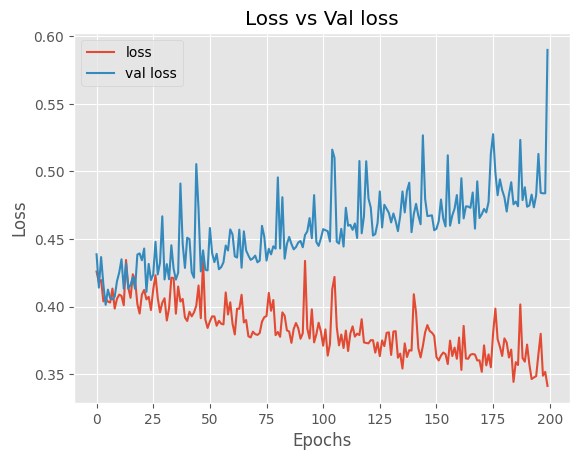

In [31]:
hist_dict_model_1 = histV1_2.history
plot_loss(hist_dict_model_1)

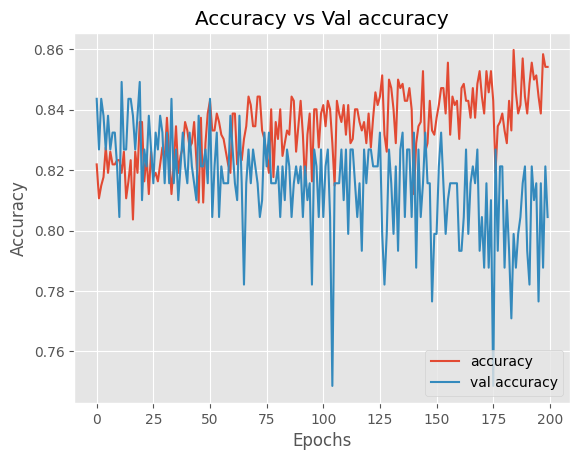

In [32]:
plot_accu(hist_dict_model_1)

In [33]:
test_loss , test_acc = modelV1.evaluate(predictors_test ,target_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.7362


In [34]:
print(len(predictors_norm_valid) + len(predictors_norm_train))

892


In [35]:
print(len(predictors_norm_train))

713


In [36]:
modelV1.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV1_3 = modelV1.fit(predictors_norm_train , target_norm_train  , validation_data = (predictors_norm_valid, target_norm_valid) , epochs = 200)

Epoch 1/200
23/23 [==============================] - 2s 18ms/step - loss: 0.8557 - accuracy: 0.5778 - val_loss: 0.6119 - val_accuracy: 0.7318
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5885 - accuracy: 0.7461 - val_loss: 0.5319 - val_accuracy: 0.7821
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5275 - accuracy: 0.7784 - val_loss: 0.5005 - val_accuracy: 0.7821
Epoch 4/200
23/23 [==============================] - 0s 9ms/step - loss: 0.5081 - accuracy: 0.7812 - val_loss: 0.4818 - val_accuracy: 0.7933
Epoch 5/200
23/23 [==============================] - 0s 7ms/step - loss: 0.4933 - accuracy: 0.7784 - val_loss: 0.4714 - val_accuracy: 0.7989
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4847 - accuracy: 0.7798 - val_loss: 0.4653 - val_accuracy: 0.7989
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4810 - accuracy: 0.7938 - val_loss: 0.4575 - val_accuracy: 0.8045
Epoch 8/200


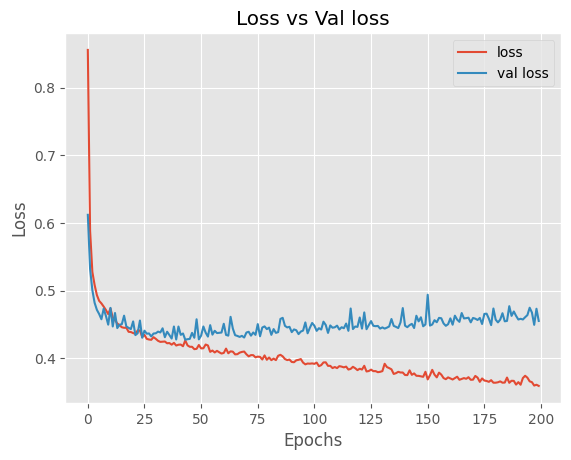

In [37]:
hist_dict_model_3 = histV1_3.history
plot_loss(hist_dict_model_3)

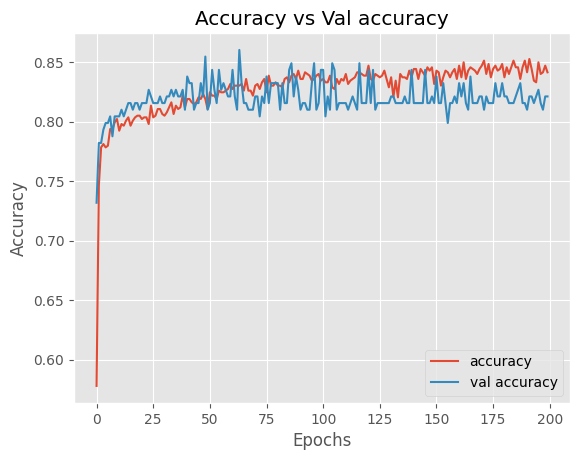

In [38]:
plot_accu(hist_dict_model_3)

In [39]:
test_loss , test_acc = modelV1.evaluate(predictors_norm_test , target_norm_test)

14/14 [==============================] - 0s 5ms/step - loss: 0.5095 - accuracy: 0.7842


In [40]:
modelV2 = Sequential()
modelV2.add(Dense(32, activation = "relu" , input_shape = (n_col ,)))
modelV2.add(tf.keras.layers.Dropout(0.5))

modelV2.add(Dense(32 , activation = "relu"))
modelV2.add(tf.keras.layers.Dropout(0.5))

modelV2.add(Dense(2 , activation = "softmax"))

In [41]:
modelV2.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV2_1 = modelV2.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )

Epoch 1/200
23/23 [==============================] - 2s 20ms/step - loss: 6.5871 - accuracy: 0.5189 - val_loss: 1.4313 - val_accuracy: 0.6648
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 4.3132 - accuracy: 0.5442 - val_loss: 1.2135 - val_accuracy: 0.6536
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 3.8027 - accuracy: 0.5526 - val_loss: 1.0361 - val_accuracy: 0.6592
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 2.3674 - accuracy: 0.5961 - val_loss: 0.9548 - val_accuracy: 0.6480
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 2.7574 - accuracy: 0.5652 - val_loss: 0.9737 - val_accuracy: 0.6425
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 2.6577 - accuracy: 0.5540 - val_loss: 0.8513 - val_accuracy: 0.6704
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 2.3337 - accuracy: 0.5764 - val_loss: 0.8196 - val_accuracy: 0.6648
Epoch 8/200


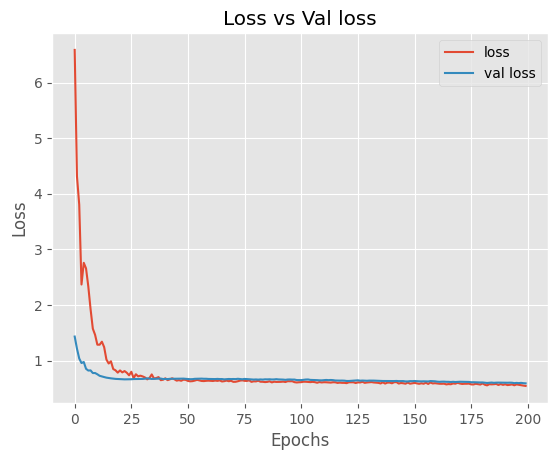

In [42]:
dict_histV2_1 = histV2_1.history
plot_loss(dict_histV2_1)


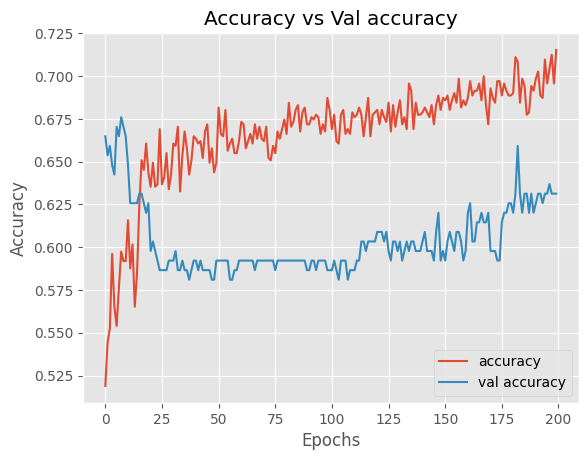

In [43]:
plot_accu(dict_histV2_1)

In [44]:
test_loss , test_acc = modelV2.evaluate(predictors_test ,target_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.6259


In [45]:
modelV3 = Sequential()
modelV3.add(Dense(32, activation = "relu" , input_shape = (n_col ,)))
modelV3.add(BatchNormalization())
modelV3.add(tf.keras.layers.Dropout(0.5))

modelV3.add(Dense(32 , activation = "relu"))
modelV3.add(BatchNormalization())
modelV3.add(tf.keras.layers.Dropout(0.5))

modelV3.add(Dense(2 , activation = "softmax"))

In [46]:
modelV3.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV3_1 = modelV3.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )

Epoch 1/200
23/23 [==============================] - 3s 25ms/step - loss: 1.2147 - accuracy: 0.4923 - val_loss: 1.0922 - val_accuracy: 0.3911
Epoch 2/200
23/23 [==============================] - 0s 6ms/step - loss: 0.9269 - accuracy: 0.5849 - val_loss: 0.7330 - val_accuracy: 0.5922
Epoch 3/200
23/23 [==============================] - 0s 7ms/step - loss: 0.8612 - accuracy: 0.6017 - val_loss: 0.6657 - val_accuracy: 0.6257
Epoch 4/200
23/23 [==============================] - 0s 6ms/step - loss: 0.8608 - accuracy: 0.5792 - val_loss: 0.6465 - val_accuracy: 0.6257
Epoch 5/200
23/23 [==============================] - 0s 6ms/step - loss: 0.8350 - accuracy: 0.6059 - val_loss: 0.6447 - val_accuracy: 0.6425
Epoch 6/200
23/23 [==============================] - 0s 6ms/step - loss: 0.7819 - accuracy: 0.6410 - val_loss: 0.6370 - val_accuracy: 0.6648
Epoch 7/200
23/23 [==============================] - 0s 6ms/step - loss: 0.8051 - accuracy: 0.6227 - val_loss: 0.6345 - val_accuracy: 0.6872
Epoch 8/200
